In [98]:
from pyforest import *

In [99]:
train = pd.read_csv("~/Downloads/Titanic/train.csv")

In [100]:
test =pd.read_csv("~/Downloads/Titanic/test.csv")

In [101]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
# Combining Train and Test
combined = pd.concat([train,test], ignore_index = True, sort = False)

In [103]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Survived     418
Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [104]:
combined[combined.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [105]:
# Find Embarked
df= pd.DataFrame(combined.groupby(["Survived", "Sex"])["Embarked"].value_counts())

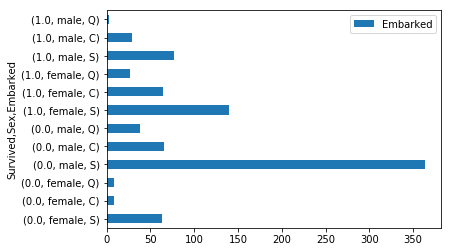

In [106]:
df.plot(kind = "barh")

# This plot shows that majority of Females who survived were from Southampton

In [107]:
# Filling S in Embarked
combined.loc[combined.Embarked.isnull(),"Embarked"]="S"

In [108]:
# Fare
combined[combined.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


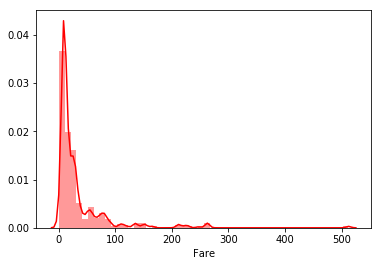

In [109]:
# Lets Find the Relation between Fare and PClass
sns.distplot(combined.Fare.dropna(), color = "red")

In [110]:
pd.DataFrame(combined.groupby(["Survived", "Sex", "Pclass"])["Fare"].describe())

count        mean         std      min       25%  \
Survived Sex    Pclass                                                     
0.0      female 1         3.0  110.604167   70.920264  28.7125  90.13125   
                2         6.0   18.250000    6.969577  10.5000  13.00000   
                3        72.0   19.773093   14.572275   6.7500   8.53125   
         male   1        77.0   62.894910   60.052545   0.0000  27.72080   
                2        91.0   19.488965   15.720548   0.0000  11.50000   
                3       300.0   12.204469   10.984904   0.0000   7.75000   
1.0      female 1        91.0  105.978159   74.738897  25.9292  57.48960   
                2        70.0   22.288989   11.140937  10.5000  13.00000   
                3        72.0   12.464526    5.984714   7.2250   7.75000   
         male   1        45.0   74.637320  101.091948  26.2875  29.70000   
                2        17.0   21.095100    9.832542  10.5000  13.00000   
                3        47.0   15.579696   15.232388   0.0000   7.82500   

                              50%         75%       max  
Survived Sex    Pclass                                   
0.0      female 1       151.55000  151.550000  151.5500  
                2        17.00000   24.750000   26.0000  
                3        14.47915   26.075025   69.5500  
         male   1        42.40000   77.287500  263.0000  
                2        13.00000   26.000000   73.5000  
                3         7.89580    9.500000   69.5500  
1.0      female 1        82.17080  134.075000  512.3292  
                2        23.00000   26.250000   65.0000  
                3         9.46875   15.912500   31.3875  
         male   1        35.50000   79.200000  512.3292  
                2        18.75000   26.000000   39.0000  
                3         8.05000   15.820850   56.4958

In [111]:
# Putting Median for male where the Pclass is 3
combined.loc[(combined.Pclass ==3) & (combined.Sex=="male") & (combined.Fare.isnull()), "Fare"] = 7.89580

In [112]:
# Age
combined[combined.Age.isnull()]["Cabin"].unique()

array([nan, 'B78', 'C52', 'F E69', 'E33', 'A32', 'A19', 'C106', 'E101',
       'C128', 'D21', 'A14', 'C95', 'C126', 'C124', 'D45', 'F38', 'B102',
       'C47', 'C92', 'D34', 'E46', 'F E46', 'D'], dtype=object)

In [113]:
combined.Cabin.dropna().unique()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24

In [114]:
# Cabin
cabincount = ['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30', 'E121',
       'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B84', 'D17', 'A36', 'B102',
       'B69', 'E49', 'C47', 'D28', 'E17', 'A24', 'C50', 'B42', 'C148',
       'B45', 'B36', 'A21', 'D34', 'A9', 'C31', 'B61', 'C53', 'D43',
       'C130', 'C132', 'C55 C57', 'C116', 'F', 'A29', 'C6', 'C28', 'C51',
       'C97', 'D22', 'B10', 'E45', 'E52', 'A11', 'B11', 'C80', 'C89',
       'F E46', 'B26', 'F E57', 'A18', 'E60', 'E39 E41', 'B52 B54 B56',
       'C39', 'B24', 'D40', 'D38', 'C105']

In [115]:
def cabins(x):
    if(x in cabincount):
        return("Cabin Allotted")
    else:
        return("No Cabin Found")

In [116]:
combined["Cabin_Status"] = pd.Series(combined.Cabin.apply(cabins))

In [117]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Status
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No Cabin Found
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cabin Allotted
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,No Cabin Found
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Cabin Allotted
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No Cabin Found


In [118]:
# Extracting Title from Name
g = combined.Name.transform(lambda x:x.split(", ")[1])
titles = g.transform(lambda x:x.split(". ")[0])

In [119]:
combined["Titles"] = pd.Series(titles)

In [120]:
titles_ignore = ['Don', 'Rev', 'Dr', 'Mme','Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
                 'Jonkheer', 'Dona']

In [121]:
def titleignore(x):
    if(x in(titles_ignore)):
        return("Others")
    else:
        return(x)

In [122]:
combined["Titles"] = combined.Titles.apply(titleignore)

In [123]:
# SIBSP and Parch
family = combined.SibSp+combined.Parch

In [124]:
family.replace(to_replace = 0, value =1,inplace = True)

In [125]:
combined["Family"] = pd.Series(family)

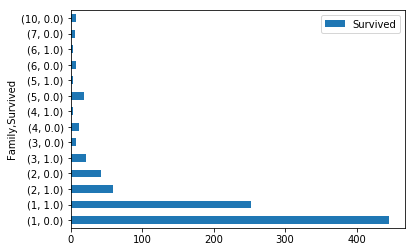

In [126]:
# Lets evaluate Family and Survival
pd.DataFrame(combined.groupby("Family")["Survived"].value_counts()).plot(kind = "barh")
# Singles have better survival chances
# Anything beyond 03 members had a rare chance of survival

In [127]:
def family_cat(x):
    if(x ==1):
        return("Singles")
    elif((x>1) & (x<3)):
        return("Small Family")
    else:
        return("Large Family")

In [128]:
combined["Family_On_Board"] = pd.Series(combined.Family.apply(family_cat))

In [129]:
# Age is Dependent on the gender in Titanic. 
combined.groupby(["Sex", "Pclass"])["Age"].describe().T

Sex         female                                male                       
Pclass           1           2           3           1          2           3
count   133.000000  103.000000  152.000000  151.000000  158.00000  349.000000
mean     37.037594   27.499223   22.185329   41.029272   30.81538   25.962264
std      14.272460   12.911747   12.205254   14.578529   13.97740   11.682415
min       2.000000    0.920000    0.170000    0.920000    0.67000    0.330000
25%      24.000000   20.000000   16.000000   30.000000   23.00000   20.000000
50%      36.000000   28.000000   22.000000   42.000000   29.50000   25.000000
75%      48.000000   34.000000   30.000000   50.000000   38.75000   32.000000
max      76.000000   60.000000   63.000000   80.000000   70.00000   74.000000

In [130]:
combined["Fare_Per_Person"] = combined.Fare/combined.Family

In [131]:
("McGowan, Miss. Anna Annie").split()[1][:-1]

'Miss'

In [132]:
titles = []
for i in combined.Name:
    titles.append(i.split()[1][:-1])

In [133]:
combined.Name[1279].split()[1][:-1]

'Mr'

In [134]:
d = pd.DataFrame(titles, columns = ["titles"])

In [135]:
combined["titles"] = d

In [136]:
agena = combined[combined.Age.isnull()]

In [137]:
agena.head()
# Rule Formation:
# 1. Person is Male or Female & PClass & Survival
# 2. Title
# 3. Family_On_Board and their Survival

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Status,Titles,Family,Family_On_Board,Fare_Per_Person,titles
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,No Cabin Found,Mr,1,Singles,8.4583,Mr
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,No Cabin Found,Mr,1,Singles,13.0000,Mr
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,No Cabin Found,Mrs,1,Singles,7.2250,Mrs
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,No Cabin Found,Mr,1,Singles,7.2250,Mr
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,No Cabin Found,Miss,1,Singles,7.8792,Miss


# Rule Formation:
1. Person is Male or Female & PClass & Survival
2. Title
3. Family_On_Board and their Survival

In [138]:
# Libraries for ANOVA
import scipy.stats as stats
#import statsmodels.api as sms
from statsmodels.formula.api import ols

In [139]:
# stats.f_oneway(data_group1, data_group2, data_group3, data_groupN)

stats.f_oneway(combined.loc[combined["Pclass"]==1]["Age"].dropna(),
               combined.loc[combined["Pclass"]==2]["Age"].dropna(),
               combined.loc[combined["Pclass"]==3]["Age"].dropna()) 

# P value shows that Pclass has an impact on the Age

F_onewayResult(statistic=108.32631005902482, pvalue=1.796708368328782e-43)

In [140]:
# model_name = ols('outcome_variable ~ group1 + group2 + groupN', data=your_data).fit()
model = ols("Age~Sex+Pclass", data = combined).fit()

In [141]:
model.summary()
# This shows that Gender has an impact on the Age Variable

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     116.0
Date:                Thu, 26 Dec 2019   Prob (F-statistic):           3.32e-46
Time:                        09:43:26   Log-Likelihood:                -4169.6
No. Observations:                1046   AIC:                             8345.
Df Residuals:                    1043   BIC:                             8360.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      43.6462      1.194     36.555      0.000      41.303      45.989
Sex[T.male]     3.7375      0.844      4.428      0.000       2.081       5.394
Pclass         -7.3008      0.485    -15.059      0.000      -8.252      -6.349
==============================================================================
Omnibus:                       14.009   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.798
Skew:                           0.242   Prob(JB):                     0.000612
Kurtosis:                       3.324   Cond. No.                         8.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Printing Model Diagnostics

1. The Durban-Watson tests is to detect the presence of autocorrelation (not provided when calling diagnostics this way), 
2. Jarque-Bera (jb; jbpv is p-value) tests the assumption of normality, 
3. Omnibus (omni; omnipv is p-value) tests the assumption of homogeneity of variance, and the 
4. Condition Number (condno) assess multicollinearity. Condition Number values over 20 are indicative of multicollinearity.

If the omnibus test were to be significant, an option on how to handle it would be to use a heteroscedasticity corrected coefficient covariance matrix in the .anova_lm() method. This corrects the calculations to account for the heteroscedasticity present.

In [142]:
print(model.diagn)

{'jb': 14.798044019974306, 'jbpv': 0.0006118508526413737, 'skew': 0.24201445096876661, 'kurtosis': 3.3244233236232192, 'omni': 14.009155048436545, 'omnipv': 0.000907717342875599, 'condno': 8.415821899016247, 'mineigval': 101.45754885423172}


In [143]:
# Checking if Title has an impact on Age
model_age = ols("Age~Titles", data = combined).fit()
model_age.summary()

# Apart from Ms, titles have significant impact on the Age

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     84.40
Date:                Thu, 26 Dec 2019   Prob (F-statistic):           1.70e-74
Time:                        09:43:27   Log-Likelihood:                -4096.5
No. Observations:                1046   AIC:                             8205.
Df Residuals:                    1040   BIC:                             8235.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.4826      1.674      3.275      0.001       2.198       8.767
Titles[T.Miss]      16.2916      1.873      8.697      0.000      12.616      19.967
Titles[T.Mr]        26.7695      1.749     15.310      0.000      23.338      30.201
Titles[T.Mrs]       31.5115      1.917     16.437      0.000      27.750      35.273
Titles[T.Ms]        22.5174     12.300      1.831      0.067      -1.619      46.653
Titles[T.Others]    37.6464      2.755     13.663      0.000      32.240      43.053
==============================================================================
Omnibus:                       89.071   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.504
Skew:                           0.759   Prob(JB):                     1.01e-24
Kurtosis:                       3.479   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
# Check Family on Board
model_family = ols("Age~Family_On_Board", data=combined).fit()
model_family.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     39.69
Date:                Thu, 26 Dec 2019   Prob (F-statistic):           2.45e-17
Time:                        09:43:28   Log-Likelihood:                -4236.3
No. Observations:                1046   AIC:                             8479.
Df Residuals:                    1043   BIC:                             8493.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          19.8208      1.351     14.673      0.000      17.170      22.472
Family_On_Board[T.Singles]         12.0055      1.438      8.349      0.000       9.184      14.827
Family_On_Board[T.Small Family]     6.7132      1.780      3.772      0.000       3.221      10.206
==============================================================================
Omnibus:                       67.941   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.073
Skew:                           0.674   Prob(JB):                     4.10e-18
Kurtosis:                       3.141   Cond. No.                         7.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Since ANOVA tests that Family On Board, Title, PClass and Gender are significant variables and hence we need to fill the median age basis these variables

In [145]:
combined.loc[(combined["Pclass"]==1) & (combined["Sex"]=="female") & (combined["Titles"]=="Miss") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"]=31.0
combined.loc[(combined["Pclass"]==1) & (combined["Sex"]=="female") & (combined["Titles"]=="Mrs") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"]=44.0
combined.loc[(combined["Pclass"]==1) & (combined["Sex"]=="male") & (combined["Titles"]=="Mr") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"] = 41.0
combined.loc[(combined["Pclass"]==1) & (combined["Sex"]=="male") & (combined["Titles"]=="Others") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"]=48.0
combined.loc[(combined["Pclass"]==2) & (combined["Sex"]=="female") & (combined["Titles"]=="Miss") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"]=26.5
combined.loc[(combined["Pclass"]==2) & (combined["Sex"]=="female") & (combined["Titles"]=="Mrs") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"]=29.5
combined.loc[(combined["Pclass"]==2) & (combined["Sex"]=="male") & (combined["Titles"]=="Mr") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"]=30.0
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="female") & (combined["Titles"]=="Miss") & (combined["Family_On_Board"]=="Large Family") & (combined["Age"].isnull()), "Age"] = 8.0
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="female") & (combined["Titles"]=="Miss") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"] = 22.0
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="female") & (combined["Titles"]=="Miss") & (combined["Family_On_Board"]=="Small Family") & (combined["Age"].isnull()), "Age"] = 4.0
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="female") & (combined["Titles"]=="Mrs") & (combined["Family_On_Board"]=="Large Family") & (combined["Age"].isnull()), "Age"] = 39.0
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="female") & (combined["Titles"]=="Mrs") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"] = 31.0
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="male") & (combined["Titles"]=="Master") & (combined["Family_On_Board"]=="Large Family") & (combined["Age"].isnull()), "Age"]=5.5
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="male") & (combined["Titles"]=="Master") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"]=6.0
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="male") & (combined["Titles"]=="Master") & (combined["Family_On_Board"]=="Small Family") & (combined["Age"].isnull()), "Age"] = 6.5
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="male") & (combined["Titles"]=="Mr") & (combined["Family_On_Board"]=="Large Family") & (combined["Age"].isnull()), "Age"] = 27.5
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="male") & (combined["Titles"]=="Mr") & (combined["Family_On_Board"]=="Singles") & (combined["Age"].isnull()), "Age"] = 26.0
combined.loc[(combined["Pclass"]==3) & (combined["Sex"]=="male") & 
             (combined["Titles"]=="Mr") & (combined["Family_On_Board"]=="Small Family") & 
             (combined["Age"].isnull()), "Age"]=25.0


In [146]:
# Check for Ms, if Less then Put it in Others

In [147]:
pd.DataFrame(combined.groupby(["Pclass", "Sex", "Titles", "Family_On_Board"])["Age"].describe())

count       mean        std    min  \
Pclass Sex    Titles Family_On_Board                                       
1      female Miss   Large Family       7.0  18.571429   8.560708   2.00   
                     Singles           47.0  32.468085  11.245968  15.00   
                     Small Family       6.0  27.500000   9.049862  18.00   
              Mrs    Large Family       5.0  39.200000  14.754660  25.00   
                     Singles           57.0  42.157895  13.398813  17.00   
                     Small Family      15.0  49.066667  10.081572  27.00   
              Others Singles            7.0  34.428571  11.148350  24.00   
       male   Master Large Family       3.0   8.306667   6.474730   0.92   
                     Small Family       2.0   5.000000   1.414214   4.00   
              Mr     Large Family       5.0  42.000000  19.710403  19.00   
                     Singles          142.0  41.017606  11.944228  17.00   
                     Small Family      12.0  45.333333  13.357554  17.00   
              Others Singles           11.0  47.272727   8.210858  32.00   
                     Small Family       4.0  54.250000  11.146748  44.00   
2      female Miss   Large Family       9.0  10.435556   9.796294   0.92   
                     Singles           32.0  26.515625   9.950267   6.00   
                     Small Family       9.0  11.666667   7.664855   2.00   
              Mrs    Large Family       8.0  33.875000  11.716137  22.00   
                     Singles           35.0  33.357143  10.813643  14.00   
                     Small Family      12.0  33.416667   9.110018  22.00   
              Ms     Singles            1.0  28.000000        NaN  28.00   
       male   Master Large Family       1.0   1.000000        NaN   1.00   
                     Small Family      10.0   2.933000   2.804794   0.67   
              Mr     Large Family       4.0  33.250000  11.954776  23.00   
                     Singles          133.0  32.157895  11.410118  14.00   
                     Small Family      13.0  31.653846  11.473492  19.00   
              Others Singles            9.0  41.888889  13.119112  23.00   
                     Small Family       1.0  30.000000        NaN  30.00   
3      female Miss   Large Family      27.0   8.765556   7.594557   0.17   
                     Singles          106.0  21.702830   6.129079   2.00   
                     Small Family      17.0   5.941176   6.036044   1.00   
              Mrs    Large Family      14.0  37.785714   6.290146  24.00   
                     Singles           31.0  32.096774  10.520947  15.00   
                     Small Family      17.0  28.647059   6.402550  16.00   
              Ms     Singles            0.0        NaN        NaN    NaN   
       male   Master Large Family      25.0   6.000000   3.807887   1.00   
                     Singles            6.0   5.708333   4.524486   0.42   
                     Small Family      14.0   6.398571   3.613408   0.33   
              Mr     Large Family      17.0  27.088235   9.131394  14.00   
                     Singles          407.0  27.710074   8.283729  11.00   
                     Small Family      24.0  26.520833   8.875319  15.00   

                                          25%   50%     75%   max  
Pclass Sex    Titles Family_On_Board                               
1      female Miss   Large Family     16.0000  21.0  23.500  28.0  
                     Singles          23.5000  31.0  37.000  63.0  
                     Small Family     19.7500  26.5  34.750  39.0  
              Mrs    Large Family     27.0000  36.0  48.000  60.0  
                     Singles          35.0000  44.0  51.000  76.0  
                     Small Family     42.5000  50.0  54.500  64.0  
              Others Singles          24.0000  33.0  43.500  49.0  
       male   Master Large Family      5.9600  11.0  12.000  13.0  
                     Small Family      4.5000   5.0   5.500   6.0  
              Mr     

In [148]:
# Age Basis PClass and Sex
pd.DataFrame(combined.groupby(["Titles", combined.Family_On_Board=="Singles"])["Age"].describe())

count       mean        std    min      25%   50%  \
Titles Family_On_Board                                                      
Master False             55.0   5.542364   3.854088   0.33   2.0000   5.5   
       True               6.0   5.708333   4.524486   0.42   2.1225   6.0   
Miss   False             75.0  11.087867   9.572230   0.17   4.0000   8.0   
       True             185.0  25.270270   9.516858   2.00  21.0000  22.0   
Mr     False             75.0  31.940000  12.966943  14.00  22.5000  28.0   
       True             682.0  31.348240  11.100366  11.00  25.0000  27.0   
Mrs    False             71.0  36.901408  11.321478  16.00  27.5000  36.0   
       True             123.0  37.117886  12.827526  14.00  28.0000  35.0   
Ms     True               1.0  28.000000        NaN  28.00  28.0000  28.0   
Others False              5.0  49.400000  14.518953  30.00  44.0000  50.0   
       True              27.0  42.148148  11.608033  23.00  32.5000  45.0   

                           75%   max  
Titles Family_On_Board                
Master False             8.000  14.5  
       True              8.250  12.0  
Miss   False            18.000  39.0  
       True             30.000  63.0  
Mr     False            40.000  64.0  
       True             36.375  80.0  
Mrs    False            45.000  64.0  
       True             45.000  76.0  
Ms     True             28.000  28.0  
Others False            53.000  70.0  
       True             51.500  60.0

In [149]:
combined.loc[combined.Age.isnull(), "Age"] =28.0

In [150]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Status,Titles,Family,Family_On_Board,Fare_Per_Person,titles
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No Cabin Found,Mr,1,Singles,7.2500,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cabin Allotted,Mrs,1,Singles,71.2833,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,No Cabin Found,Miss,1,Singles,7.9250,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Cabin Allotted,Mrs,1,Singles,53.1000,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No Cabin Found,Mr,1,Singles,8.0500,Mr


In [151]:
combined.groupby("titles")["Age"].describe().T

titles,,Billiard,Brito,Capt,Carlo,Col,Cruyssen,Don,Dr,Gordon,...,Palmquist,Pelsmaeker,Planke,Rev,Shawah,Steen,Velde,Walle,de,th
count,8.000000,3.00000,1.0,1.0,2.000000,4.000000,1.0,1.0,8.000000,2.000000,...,1.0,1.0,4.000000,8.000000,1.0,1.0,1.0,1.0,1.0,1.0
mean,27.312500,19.50000,32.0,70.0,26.500000,54.000000,47.0,40.0,44.125000,48.500000,...,26.0,16.0,24.000000,41.250000,30.0,28.0,33.0,28.0,61.0,33.0
std,7.055583,18.35756,NaN,NaN,3.535534,5.477226,NaN,NaN,10.973182,0.707107,...,NaN,NaN,8.124038,12.020815,NaN,NaN,NaN,NaN,NaN,NaN
min,17.000000,6.50000,32.0,70.0,24.000000,47.000000,47.0,40.0,23.000000,48.000000,...,26.0,16.0,16.000000,27.000000,30.0,28.0,33.0,28.0,61.0,33.0
25%,24.750000,9.00000,32.0,70.0,25.250000,51.500000,47.0,40.0,41.000000,48.250000,...,26.0,16.0,17.500000,29.500000,30.0,28.0,33.0,28.0,61.0,33.0
50%,28.750000,11.50000,32.0,70.0,26.500000,54.500000,47.0,40.0,48.500000,48.500000,...,26.0,16.0,24.500000,41.500000,30.0,28.0,33.0,28.0,61.0,33.0
75%,30.000000,26.00000,32.0,70.0,27.750000,57.000000,47.0,40.0,50.750000,48.750000,...,26.0,16.0,31.000000,51.750000,30.0,28.0,33.0,28.0,61.0,33.0
max,39.000000,40.50000,32.0,70.0,29.000000,60.000000,47.0,40.0,54.000000,49.000000,...,26.0,16.0,31.000000,57.000000,30.0,28.0,33.0,28.0,61.0,33.0


### Another Approach for Missing Age Values
1. combined.loc[(combined.titles=="Miss") & (combined.Age.isnull()), "Age"]=22.0
2. combined.loc[(combined.titles=="Master") & (combined.Age.isnull()), "Age"]=4.0
3. combined.loc[(combined.titles=="Mr") & (combined.Age.isnull()), "Age"]=29.0
4. combined.loc[(combined.titles=="Mrs") & (combined.Age.isnull()), "Age"]=36.0
5. combined.loc[(combined.titles=="Others") & (combined.Age.isnull()), "Age"]=33.0

In [152]:
# dropping Name, Ticket, Cabin and Passenger ID
combined_new = combined.drop(['PassengerId', 'Name', "SibSp", "Parch", 'Ticket', 'Cabin'], axis = 1)

In [153]:
combined_new.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_Status,Titles,Family,Family_On_Board,Fare_Per_Person,titles
0,0.0,3,male,22.0,7.2500,S,No Cabin Found,Mr,1,Singles,7.2500,Mr
1,1.0,1,female,38.0,71.2833,C,Cabin Allotted,Mrs,1,Singles,71.2833,Mrs
2,1.0,3,female,26.0,7.9250,S,No Cabin Found,Miss,1,Singles,7.9250,Miss
3,1.0,1,female,35.0,53.1000,S,Cabin Allotted,Mrs,1,Singles,53.1000,Mrs
4,0.0,3,male,35.0,8.0500,S,No Cabin Found,Mr,1,Singles,8.0500,Mr


In [154]:
# Split the data in train and test
newtrain = combined_new.loc[0:train.shape[0]-1]

In [155]:
newtrain.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Cabin_Status',
       'Titles', 'Family', 'Family_On_Board', 'Fare_Per_Person', 'titles'],
      dtype='object')

In [156]:
newtest = combined_new.loc[891:, :]

In [157]:
newtest.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Cabin_Status',
       'Titles', 'Family', 'Family_On_Board', 'Fare_Per_Person', 'titles'],
      dtype='object')

In [158]:
newtest.drop(['Survived'], axis=1,inplace=True)
print(newtest.columns)

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Cabin_Status', 'Titles',
       'Family', 'Family_On_Board', 'Fare_Per_Person', 'titles'],
      dtype='object')


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [159]:
newtrain["Survived"] = newtrain.Survived.astype("int")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [160]:
print(newtrain.columns)
print(newtest.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Cabin_Status',
       'Titles', 'Family', 'Family_On_Board', 'Fare_Per_Person', 'titles'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Cabin_Status', 'Titles',
       'Family', 'Family_On_Board', 'Fare_Per_Person', 'titles'],
      dtype='object')


In [161]:
newtrain.to_csv("TitanicTrain.csv", index = False)
newtest.to_csv("TitanicTest.csv", index = False)

In [162]:
cd

/Users/mukul.singh


In [163]:
newtrain.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_Status,Titles,Family,Family_On_Board,Fare_Per_Person,titles
0,0,3,male,22.0,7.2500,S,No Cabin Found,Mr,1,Singles,7.2500,Mr
1,1,1,female,38.0,71.2833,C,Cabin Allotted,Mrs,1,Singles,71.2833,Mrs
2,1,3,female,26.0,7.9250,S,No Cabin Found,Miss,1,Singles,7.9250,Miss
3,1,1,female,35.0,53.1000,S,Cabin Allotted,Mrs,1,Singles,53.1000,Mrs
4,0,3,male,35.0,8.0500,S,No Cabin Found,Mr,1,Singles,8.0500,Mr


In [164]:
x = newtrain.drop(["Survived","titles"], axis = 1)
y = newtrain.Survived

In [165]:
# dummies
ohe = pd.get_dummies(x)

In [166]:
ohe.columns

Index(['Pclass', 'Age', 'Fare', 'Family', 'Fare_Per_Person', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Cabin_Status_Cabin Allotted', 'Cabin_Status_No Cabin Found',
       'Titles_Master', 'Titles_Miss', 'Titles_Mr', 'Titles_Mrs', 'Titles_Ms',
       'Titles_Others', 'Family_On_Board_Large Family',
       'Family_On_Board_Singles', 'Family_On_Board_Small Family'],
      dtype='object')

### Trying Sequential Feature Selector

In [169]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()

In [172]:
sfs1 = SFS(gbm, 
           k_features=ohe.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)
sfs1 = sfs1.fit(ohe, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.8s finished

[2019-12-26 09:47:36] Features: 1/21 -- score: 0.7867564534231201[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.1s finished

[2019-12-26 09:47:38] Features: 2/21 -- score: 0.8608305274971941[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.3s finished

[2019-12-26 09:47:39] Features: 3/21 -- score: 0.8933782267115601[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [173]:
# Via the subsets_ attribute, we can take a look at the selected feature indices at each step:
sfs1.subsets_

{1: {'feature_idx': (5,),
  'cv_scores': array([0.78675645]),
  'avg_score': 0.7867564534231201,
  'feature_names': ('Sex_female',)},
 2: {'feature_idx': (4, 5),
  'cv_scores': array([0.86083053]),
  'avg_score': 0.8608305274971941,
  'feature_names': ('Fare_Per_Person', 'Sex_female')},
 3: {'feature_idx': (1, 4, 5),
  'cv_scores': array([0.89337823]),
  'avg_score': 0.8933782267115601,
  'feature_names': ('Age', 'Fare_Per_Person', 'Sex_female')},
 4: {'feature_idx': (1, 2, 4, 5),
  'cv_scores': array([0.8989899]),
  'avg_score': 0.898989898989899,
  'feature_names': ('Age', 'Fare', 'Fare_Per_Person', 'Sex_female')},
 5: {'feature_idx': (0, 1, 2, 4, 5),
  'cv_scores': array([0.90796857]),
  'avg_score': 0.9079685746352413,
  'feature_names': ('Pclass', 'Age', 'Fare', 'Fare_Per_Person', 'Sex_female')},
 6: {'feature_idx': (0, 1, 2, 4, 5, 15),
  'cv_scores': array([0.91021324]),
  'avg_score': 0.9102132435465768,
  'feature_names': ('Pclass',
   'Age',
   'Fare',
   'Fare_Per_Person',
  

In [186]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [188]:
efs1 = EFS(gbm, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(ohe, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 6917/7546

Best accuracy score: 0.84
Best subset (indices): (3, 10, 14, 17)
Best subset (corresponding names): ('Family', 'Cabin_Status_Cabin Allotted', 'Titles_Mr', 'Titles_Others')


In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [76]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(ohe,y,test_size = 0.20, random_state = 0)

In [77]:
scaled_train = pd.DataFrame(sc.fit_transform(xtrain), columns = xtrain.columns)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [79]:
scaled_test = pd.DataFrame(sc.transform(xtest), columns = xtest.columns)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [82]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
pred = gbm.fit(scaled_train,ytrain).predict(scaled_test)

from sklearn.metrics import accuracy_score, cohen_kappa_score, matthews_corrcoef
print("Accuracy Score", accuracy_score(ytest, pred))
print("Cohen Kappa", cohen_kappa_score(ytest, pred))
print("Matthew's Correlation", matthews_corrcoef(ytest, pred))

Accuracy Score 0.8435754189944135
Cohen Kappa 0.6625370320495556
Matthew's Correlation 0.6656382860451193


In [80]:
from sklearn.cluster import KMeans, AgglomerativeClustering
k = KMeans(n_clusters=2)

In [83]:
scaled_train["KMeans_Clusters"] = k.fit_predict(scaled_train)

In [84]:
scaled_test["KMeans_Clusters"] = k.fit_predict(scaled_test)

In [85]:
# After Clustering
#from sklearn.ensemble import GradientBoostingClassifier
gbm1 = GradientBoostingClassifier()
pred = gbm1.fit(scaled_train,ytrain).predict(scaled_test)

from sklearn.metrics import accuracy_score, cohen_kappa_score, matthews_corrcoef
print("Accuracy Score", accuracy_score(ytest, pred))
print("Cohen Kappa", cohen_kappa_score(ytest, pred))
print("Matthew's Correlation", matthews_corrcoef(ytest, pred))

Accuracy Score 0.8491620111731844
Cohen Kappa 0.6754851272409856
Matthew's Correlation 0.6778885859702577


In [88]:
# Dropping K Means Labels
scaled_train = scaled_train.drop("KMeans_Clusters", axis = 1)
scaled_test = scaled_test.drop("KMeans_Clusters", axis = 1)

In [91]:
agg = AgglomerativeClustering(n_clusters=2)

In [92]:
scaled_train["Agg_Clusters"] = agg.fit_predict(scaled_train)
scaled_test["Agg_Clusters"] = agg.fit_predict(scaled_test)

In [93]:
# After Clustering
#from sklearn.ensemble import GradientBoostingClassifier
gbm2 = GradientBoostingClassifier()
pred = gbm2.fit(scaled_train,ytrain).predict(scaled_test)

from sklearn.metrics import accuracy_score, cohen_kappa_score, matthews_corrcoef
print("Accuracy Score", accuracy_score(ytest, pred))
print("Cohen Kappa", cohen_kappa_score(ytest, pred))
print("Matthew's Correlation", matthews_corrcoef(ytest, pred))

Accuracy Score 0.8491620111731844
Cohen Kappa 0.6736884747822565
Matthew's Correlation 0.6777094010108027


### Conclusion

Not much of a difference is found when we compare K Means and Agglomerative Clustering on Titanic Dataset but yes, before clustering and after clustering, the accuracy has improved although the improvement is small but it shows a positive sign.

Moreover, through clustering, it would have become easy for the machine to learn the pattern through groups.